# Problem 1

Recall that for the original GAN, the discriminator $f_\phi(x)$ is trained with the following optimization:

$$\max_\phi p(x) \log [f_\phi(x)] + q_\theta(x) \log [1 - f_\phi(x)]$$

where $p(x)$ is the true data distribution, $q_\theta(x)$ is the generator's learned distribution, and $f_\phi(x) \in [0, 1]$.

1. Assuming $q_\theta(x)$ is fixed, what is the solution to this optimization problem? "Solution" here means the function $f_\phi(x)$ that maximizes the above objective. Your expression should be in terms of $p(x)$ and $q_\theta(x)$.
1. Assume that $q_\theta(x) = p(x)$, i.e. the generator has learned to fit the data distribution perfectly. What is the optimal discriminator in this case?



*   **q1 & q2:**

<div>
<img src="https://drive.google.com/uc?id=18JxHEn4ZrQW_qfup3-vgKD1djLYlaDmN" align="left" width="500"/>
<img src="https://drive.google.com/uc?id=1HiWDChiTbqJT8XrHJDB1MRzXoS5bAA7E" align="right" width="500"/>
</div>



# Problem 2

Consider the following min-max optimization problem: $\min_x \max_y xy$.

1. Is there a stationary point to the function $xy$ (i.e. a point where $\frac{\partial xy}{\partial x} = 0$ and $\frac{\partial xy}{\partial y} = 0$)? If so, what is it?

1. Consider tackling this optimization problem with alternating gradient descent (i.e. alternatingly minimizing with respect to $x$ and maximizing with respect to $y$ using gradient descent). Assume that the learning rate is the same for both steps and that optimization begins from the point $x = 1, y = 1$. Will optimization reach a stationary point? Feel free to support your answer theoretically and/or empirically (i.e. by implementing it in code).




**q1:**

The partial derivatives of the function xy with respect to x and y => 

∂(xy)/∂x = y, ∂(xy)/∂y = x

In order to find a stationary point, we set the partial derivatives to equal to 0 =>

∂(xy)/∂x = y = 0, ∂(xy)/∂y = x = 0

Thus, the stationary point for the function xy appears at the origin (x=0, y=0). Nevertheless, this point is not an interior stationary point since the partial derivatives do not vanish in the domain's interior. 






**q2:**

Through using the gradient descent, now the x and y are updated by: 

x_new = x_old - learning rate \* ∂(xy)/∂x = x_old - learning rate * y

y_new = y_old + learning rate \* ∂(xy)/∂y = y_old + learning rate * x

The optimization begins from the point x=1, y=1: 

x_1 = 1 - lr * (1) = 1 - lr

y_1 = 1 + lr * (1) = 1 + lr

For the next iteration: 

x_2 = x_1 - lr \* y_1 = (1-lr) - lr\*(1+lr) = 1- 2*lr-$lr^{2}$

y_2 = y_1 + lr\*x_1=(1+lr)+lr\*(1-lr)=1+ 2*lr-$lr^{2}$

From the above, we can find that the updated value of x depends on the current value of y and the updated value of y depends on the current value of x. It means that the updates for x and y are not simultaneous and consequently, the optimization steps can not reach a stationary point.

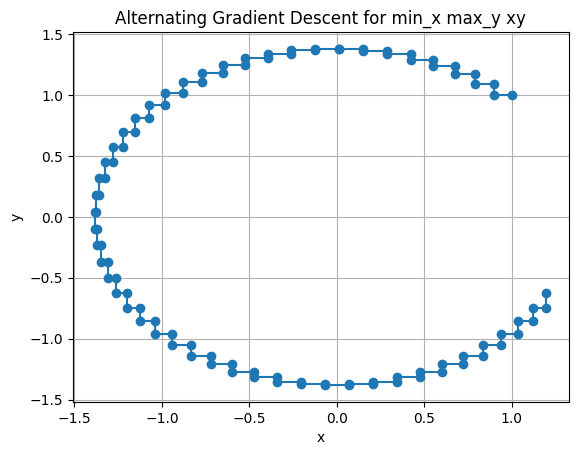

In [2]:
import matplotlib.pyplot as plt

def grad_x(x, y):
    return y

def grad_y(x, y):
    return x

def alternating_gradient_descent(x_init, y_init, alpha, num_iterations):
    x, y = x_init, y_init
    x_values, y_values = [x], [y]

    for _ in range(num_iterations):
        x = x - alpha * grad_x(x, y)
        x_values.append(x)
        y_values.append(y)

        y = y + alpha * grad_y(x, y)
        x_values.append(x)
        y_values.append(y)

    return x_values, y_values

x_init, y_init = 1, 1
alpha = 0.1
num_iterations = 50

x_values, y_values = alternating_gradient_descent(x_init, y_init, alpha, num_iterations)

plt.plot(x_values, y_values, marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Alternating Gradient Descent for min_x max_y xy')
plt.grid(True)
plt.show()


From the plot, we can see that using gradient descent does not converge to a stationary point here. 

# Problem 3

The code below is taken from [the example in the textbook](http://d2l.ai/chapter_generative-adversarial-networks/gan.html). I've modified the example so that the true data distribution is a mixture of two Gaussians rather than a single Gaussian. Feel free to use the Pytorch code in this problem instead, but make sure you keep my modification to the data distribution.

The code below uses the original GAN loss. A somewhat popular alternative loss function is the ["Least-Squares GAN (LS-GAN)"](https://arxiv.org/pdf/1611.04076.pdf), which is defined as follows:

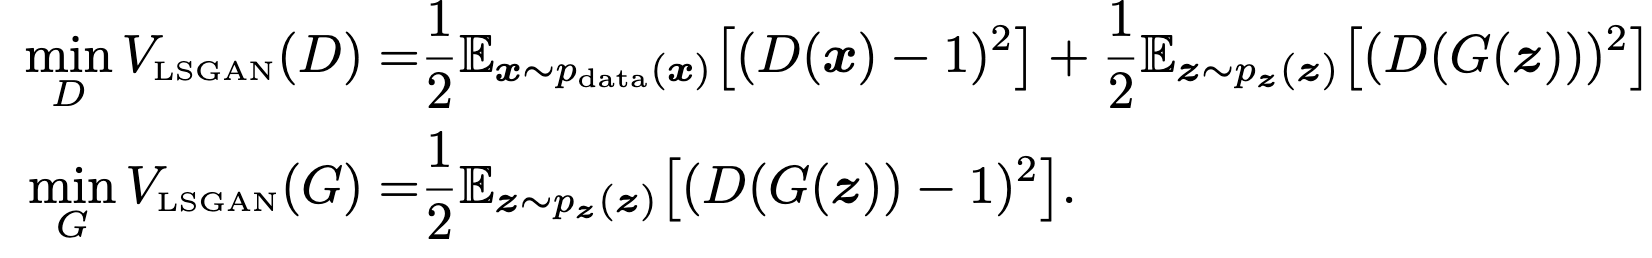

Modify the code so that it uses the LS-GAN objective instead of the original GAN objective. Does it converge to a different solution?

**Original GAN**

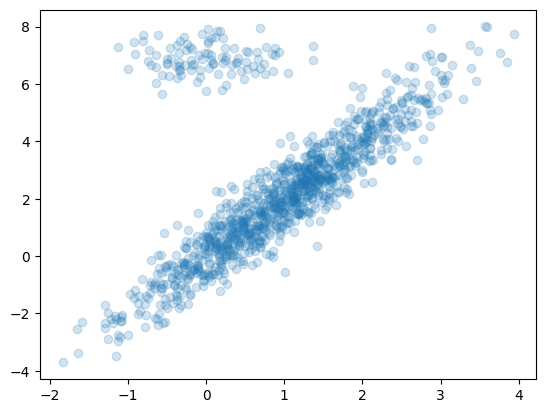

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from torch import nn

# Do not change this part! It is different from the example in the textbook.
X = np.random.normal(0.0, 1, (1000, 2))
A = np.array([[1, 2], [-0.1, 0.5]])
b = np.array([1, 2])
data = np.concatenate([np.dot(X, A) + b, np.random.normal(0.0, 0.5, (100, 2)) + np.array([0, 7])], 0)
np.random.shuffle(data)
data = torch.tensor(data, dtype=torch.float32)
plt.scatter(data[:, 0].numpy(), data[:, 1].numpy(), alpha=0.2)

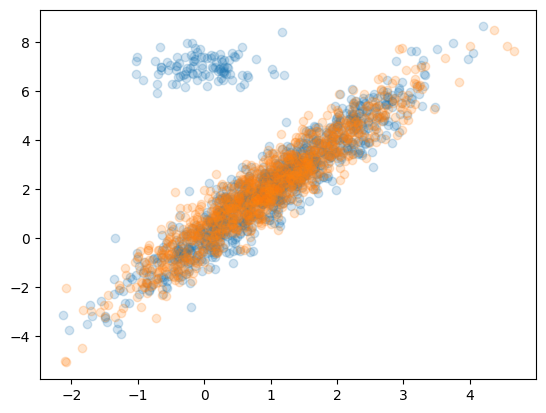

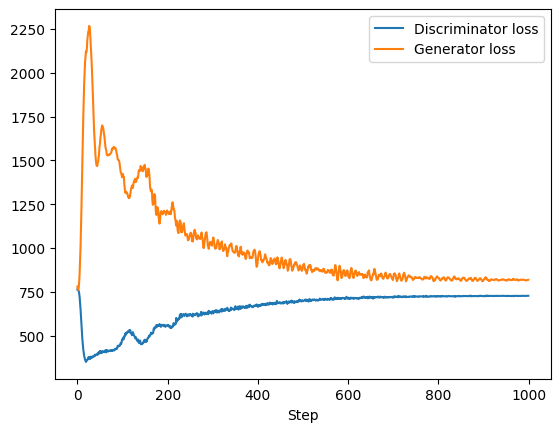

In [ ]:
net_G = nn.Sequential(nn.Linear(2, 2))

net_D = nn.Sequential(
    nn.Linear(2, 5), nn.Tanh(),
    nn.Linear(5, 3), nn.Tanh(),
    nn.Linear(3, 1))

def update_D(X, Z, net_D, net_G, loss, trainer_D):
    """Update discriminator."""
    batch_size = X.shape[0]
    ones = torch.ones((batch_size,), device=X.device)
    zeros = torch.zeros((batch_size,), device=X.device)
    trainer_D.zero_grad()
    real_Y = net_D(X)
    fake_X = net_G(Z)
    # Do not need to compute gradient for `net_G`, detach it from
    # computing gradients.
    fake_Y = net_D(fake_X.detach())
    loss_D = (loss(real_Y, ones.reshape(real_Y.shape)) +
              loss(fake_Y, zeros.reshape(fake_Y.shape))) / 2
    loss_D.backward()
    trainer_D.step()
    return loss_D

def update_G(Z, net_D, net_G, loss, trainer_G):
    """Update generator."""
    batch_size = Z.shape[0]
    ones = torch.ones((batch_size,), device=Z.device)
    trainer_G.zero_grad()
    # We could reuse `fake_X` from `update_D` to save computation
    fake_X = net_G(Z)
    # Recomputing `fake_Y` is needed since `net_D` is changed
    fake_Y = net_D(fake_X)
    loss_G = loss(fake_Y, ones.reshape(fake_Y.shape))
    loss_G.backward()
    trainer_G.step()
    return loss_G

def train(net_D, net_G, num_steps, lr_D, lr_G, latent_dim, data):
    loss = nn.BCEWithLogitsLoss(reduction='sum')
    for w in net_D.parameters():
        nn.init.normal_(w, 0, 0.02)
    for w in net_G.parameters():
        nn.init.normal_(w, 0, 0.02)
    trainer_D = torch.optim.Adam(net_D.parameters(), lr=lr_D)
    trainer_G = torch.optim.Adam(net_G.parameters(), lr=lr_G)
    losses_D, losses_G = [], []
    for epoch in range(num_steps):
        batch_size = data.shape[0]
        Z = torch.normal(0, 1, size=(batch_size, latent_dim))
        losses_D.append(update_D(data, Z, net_D, net_G, loss, trainer_D).detach().numpy())
        losses_G.append(update_G(Z, net_D, net_G, loss, trainer_G).detach().numpy())
    # Visualize generated examples
    Z = torch.normal(0, 1, size=(1000, latent_dim))
    fake_X = net_G(Z).detach().numpy()
    plt.figure()
    plt.scatter(data.detach().numpy()[:, 0], data.detach().numpy()[:, 1], alpha=0.2)
    plt.scatter(fake_X[:, 0], fake_X[:, 1], alpha=0.2)
    plt.figure()
    plt.plot(losses_D, label="Discriminator loss")
    plt.plot(losses_G, label="Generator loss")
    plt.legend()
    plt.xlabel("Step")

lr_D, lr_G, latent_dim, num_epochs = 0.05, 0.005, 2, 1000
train(net_D, net_G, num_epochs, lr_D, lr_G, latent_dim, data)

**Least Squares GAN**

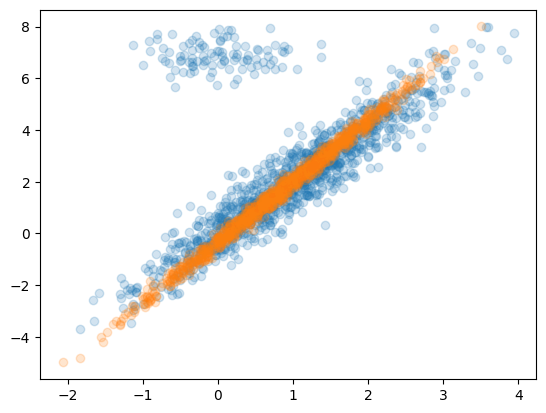

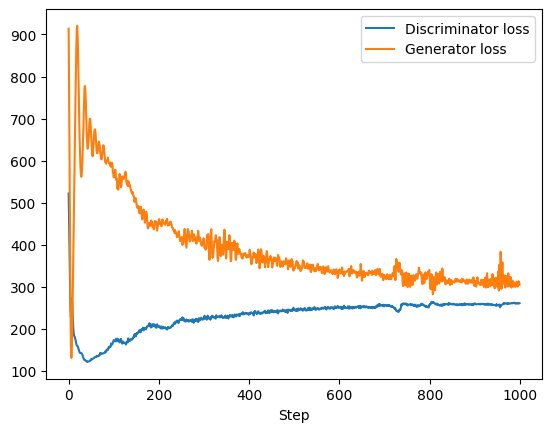

In [3]:
net_G = nn.Sequential(nn.Linear(2, 2))

net_D = nn.Sequential(
    nn.Linear(2, 5), nn.Tanh(),
    nn.Linear(5, 3), nn.Tanh(),
    nn.Linear(3, 1))

# Replace the original loss function with Mean Squared Error loss
loss = nn.MSELoss(reduction='sum')

# Update the update_D function to use the LS-GAN objective
def update_D_LS(X, Z, net_D, net_G, loss, trainer_D):
    batch_size = X.shape[0]
    ones = torch.ones((batch_size, 1), device=X.device)
    zeros = torch.zeros((batch_size, 1), device=X.device)
    trainer_D.zero_grad()
    real_Y = net_D(X)
    fake_X = net_G(Z)
    fake_Y = net_D(fake_X.detach())
    loss_D = (loss(real_Y, ones) + loss(fake_Y, zeros)) / 2
    loss_D.backward()
    trainer_D.step()
    return loss_D

# Update the update_G function to use the LS-GAN objective
def update_G_LS(Z, net_D, net_G, loss, trainer_G):
    batch_size = Z.shape[0]
    ones = torch.ones((batch_size, 1), device=Z.device)
    trainer_G.zero_grad()
    fake_X = net_G(Z)
    fake_Y = net_D(fake_X)
    loss_G = loss(fake_Y, ones)
    loss_G.backward()
    trainer_G.step()
    return loss_G

# Update the train function to use the new update_D_LS and update_G_LS functions
def train_LS(net_D, net_G, num_epochs, lr_D, lr_G, latent_dim, data):
    for w in net_D.parameters():
        nn.init.normal_(w, 0, 0.02)
    for w in net_G.parameters():
        nn.init.normal_(w, 0, 0.02)
    trainer_D = torch.optim.Adam(net_D.parameters(), lr=lr_D)
    trainer_G = torch.optim.Adam(net_G.parameters(), lr=lr_G)
    losses_D, losses_G = [], []
    for epoch in range(num_epochs):
        batch_size = data.shape[0]
        Z = torch.normal(0, 1, size=(batch_size, latent_dim))
        losses_D.append(update_D_LS(data, Z, net_D, net_G, loss, trainer_D).detach().numpy())
        losses_G.append(update_G_LS(Z, net_D, net_G, loss, trainer_G).detach().numpy())
    Z = torch.normal(0, 1, size=(1000, latent_dim))
    fake_X = net_G(Z).detach().numpy()
    plt.figure()
    plt.scatter(data.detach().numpy()[:, 0], data.detach().numpy()[:, 1], alpha=0.2)
    plt.scatter(fake_X[:, 0], fake_X[:, 1], alpha=0.2)
    plt.figure()
    plt.plot(losses_D, label="Discriminator loss")
    plt.plot(losses_G, label="Generator loss")
    plt.legend()
    plt.xlabel("Step")

# Train the LS-GAN using the modified train_LS function
lr_D, lr_G, latent_dim, num_epochs = 0.05, 0.005, 2, 1000
train_LS(net_D, net_G, num_epochs, lr_D, lr_G, latent_dim, data)

We can see that both the discriminator and generator losses are lower compared to the original GAN. The Least Squares Gans used the least squares loss function which penalized the difference between the predicted and target values with a quadratic term. It can lead to more stable training dynamics and potentially better convergence. 